In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import re
from datetime import date
import holidays

In [234]:
## Christine's Directory
mydir = "C:/users/cedirp/Downloads/"
WegmansData = mydir + "WegmansFinalMergedFile062321_2.csv"
WFD = pd.read_csv(WegmansData)

### EDA & FEATURE ENGINEERING

In [235]:
##reduce memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format
                      (end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [236]:
# Using  above function to reduce memory usage for Train test df
WFD=reduce_mem_usage(WFD)

Mem. usage decreased to 116.74 Mb (43.3% reduction)


In [250]:
WFD['DATE_KEY'] =  pd.to_datetime(WFD['DATE_KEY'], format='%m/%d/%Y')

In [251]:
WFD.rename({'DEPT.CAT': 'DEPT_CAT', 'DEPT.CLASS': 'DEPT_CLASS','CAT.CLASS':'CAT_CLASS'}, axis=1, inplace=True)
WFD

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,PPU,LOCATION_NBR,INSTACART_IND,...,CAT_CLASS,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN,cluster,DEPTNAME2
0,6.980000e+18,2020-09-13,10.0,27746.0,1.0,0.000000,5.039062,5.04,66.0,0.0,...,SUBMARINE SANDWICHES.MEDIUM SUBS,0.0,0.0,1.0,10.0,62.0,125000.0,2.0,1.0,OF SUBMARINE SHOP
1,-6.860000e+18,2020-06-28,10.0,47754.0,0.0,0.000000,0.000000,-,66.0,0.0,...,PERSONAL SHOPPING FEES.WEG2GO DIGITAL TIPS,0.0,0.0,0.0,10.0,62.0,125000.0,2.0,1.0,COMMUNITY RELATIONS ITEMS
2,-6.860000e+18,2020-06-28,10.0,45978.0,1.0,0.000000,0.000000,-,66.0,0.0,...,SNACKS/GROCERY.CHIPS/SNACKS,0.0,0.0,1.0,10.0,62.0,125000.0,2.0,1.0,OF SUBMARINE SHOP
3,-6.860000e+18,2020-06-28,10.0,49316.0,2.0,0.000000,10.796875,5.4,66.0,0.0,...,SUBMARINE SANDWICHES.MEDIUM SUBS,0.0,0.0,1.0,10.0,62.0,125000.0,2.0,1.0,OF SUBMARINE SHOP
4,-6.860000e+18,2020-06-28,10.0,27746.0,1.0,0.000000,4.679688,4.68,66.0,0.0,...,SUBMARINE SANDWICHES.MEDIUM SUBS,0.0,0.0,1.0,10.0,62.0,125000.0,2.0,1.0,OF SUBMARINE SHOP
5,8.390000e+18,2020-06-14,10.0,46287.0,1.0,0.000000,2.150391,2.15,66.0,0.0,...,WEGMANS2GO.DELIVERY & SERVICE FEES,0.0,0.0,0.0,10.0,62.0,125000.0,2.0,1.0,DIGITAL FULFILLMENT
6,8.390000e+18,2020-06-14,10.0,49316.0,2.0,0.000000,10.796875,5.4,66.0,0.0,...,SUBMARINE SANDWICHES.MEDIUM SUBS,0.0,0.0,1.0,10.0,62.0,125000.0,2.0,1.0,OF SUBMARINE SHOP
7,5.590000e+18,2020-05-21,10.0,46287.0,1.0,0.000000,2.150391,2.15,66.0,0.0,...,WEGMANS2GO.DELIVERY & SERVICE FEES,0.0,0.0,0.0,10.0,62.0,125000.0,2.0,1.0,DIGITAL FULFILLMENT
8,5.590000e+18,2020-05-21,10.0,49316.0,2.0,0.000000,10.796875,5.4,66.0,0.0,...,SUBMARINE SANDWICHES.MEDIUM SUBS,0.0,0.0,1.0,10.0,62.0,125000.0,2.0,1.0,OF SUBMARINE SHOP
9,6.670000e+18,2020-05-06,10.0,46287.0,1.0,0.000000,0.000000,-,66.0,0.0,...,WEGMANS2GO.DELIVERY & SERVICE FEES,0.0,0.0,0.0,10.0,62.0,125000.0,2.0,1.0,DIGITAL FULFILLMENT


In [252]:
WFD['DEPTNAME2'] = WFD['DEPARTMENT_NAME']

In [253]:
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.PAPER TOWELS'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.HOUSEHOLD CLEANERS'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GM BASIC PRODUCTS DEPARTMENT.CLEANING SUPPLIES'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.PAPER NAPKINS'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.BATH TISSUE'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.FACIAL TISSUE'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.LAUNDRY DETERGENT'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.DISH DETERGENT & ADDITIVES'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.AIR CARE'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'HEALTH & BEAUTY CARE.BABY WIPES'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'
WFD.loc[(WFD.DEPT_CAT == 'GROCERY.DIAPERS'),'DEPTNAME2']='GROCERY.CLEANING_SUPPLIES'

In [254]:
WFD['DEPTNAME2'].value_counts()

GROCERY                         328087
PRODUCE                         175370
DAIRY                            91847
FROZEN FOOD                      45276
HEALTH & BEAUTY CARE             41816
MEAT                             37738
CULTURED DAIRY                   34198
BEVERAGE CONTAINER RETURNS       33723
BAKESHOP                         31806
GROCERY.CLEANING_SUPPLIES        23294
COLD CUTS & CHEESE               21756
ICE CREAM                        15656
IN-STORE BREAD & ROLLS           11393
OLDE WORLD CHEESE                11209
COMMUNITY RELATIONS ITEMS        11090
EGGS                             10868
GM BASIC PRODUCTS DEPARTMENT      9957
DAIRY PRE-PACK                    9830
INSTORE BREAKFAST                 9397
BEER & WINE COOLERS               8800
BULK FOODS                        7424
CARD DEPARTMENT                   6452
IN-STORE DESSERTS                 6449
HOMESTYLE AMERICAN                5962
OF SUBMARINE SHOP                 5119
PIZZA                    

In [255]:
#create feature to identify whether a purchased item was wegmans organic brand
def isorganic(WFD):
  if WFD['IS_ORGANIC'] & WFD['IS_WEGMANSBRAND'] == 1:
    return 1
  elif WFD['IS_ORGANIC'] == 0:
    return 0
  elif WFD['IS_WEGMANSBRAND'] == 0:
    return 0
  else:
    return 'Undefined'

In [256]:
#create feature to identify whether a purchased item was wegmans brand family pack
def isfampack(WFD):
  if WFD['IS_FAMILYPACK'] & WFD['IS_WEGMANSBRAND'] == 1:
    return 1
  elif WFD['IS_FAMILYPACK'] == 0:
    return 0
  elif WFD['IS_WEGMANSBRAND'] == 0:
    return 0
  else:
    return 'Undefined'

In [257]:
#create feature to identify whether an item was bought in bulk
def isbulk(WFD):
  if WFD['UNITS'] >= 6:
    return 1
  else:
    return 0

In [ ]:
WFD['WEGMANS_ORGANIC'] = WFD.apply(isorganic, axis=1)

In [ ]:
WFD['WEGMANS_FAMPACK'] = WFD.apply(isfampack, axis=1)

In [ ]:
WFD['IS_BULK'] = WFD.apply(isbulk, axis=1)

In [258]:
WFD.dtypes

TRANSACTION_KEY             float32
DATE_KEY             datetime64[ns]
CUSTOMER_ID                 float16
ITEM_NBR                    float32
UNITS                       float16
WEIGHT                      float16
SALES                       float16
 PPU                         object
LOCATION_NBR                float16
INSTACART_IND               float16
ITEM_DESCRIPTION             object
PRODUCT_HIERARCHY            object
DEPARTMENT_NAME              object
CATEGORY_NAME                object
CLASS_NAME                   object
DEPT_CAT                     object
DEPT_CLASS                   object
CAT_CLASS                    object
IS_ORGANIC                  float16
IS_FAMILYPACK               float16
IS_WEGMANSBRAND             float16
HOUSEHOLD_ID                float16
HOH_AGE                     float16
HH_INCOME                   float32
HH_CHILDREN                 float16
cluster                     float16
DEPTNAME2                    object
dtype: object

In [295]:
WFD['quarter'] = WFD['DATE_KEY'].dt.quarter
WFD['weekno'] = WFD['DATE_KEY'].dt.week
WFD['dayofweek'] = WFD['DATE_KEY'].dt.weekday
WFD['year'] = WFD['DATE_KEY'].dt.year

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B9A6ECDA0>]],
      dtype=object)

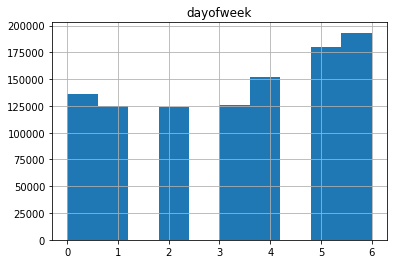

In [260]:
WFD.hist(column = ['dayofweek'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BF0278160>]],
      dtype=object)

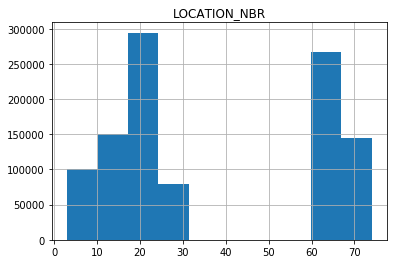

In [261]:
WFD.hist(column = ['LOCATION_NBR'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B962D4438>]],
      dtype=object)

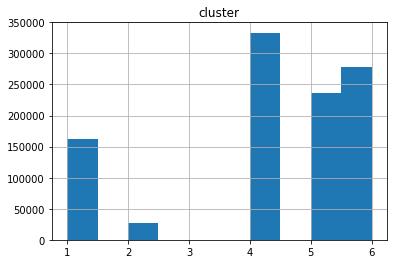

In [262]:
WFD.hist(column = ['cluster'])

### TRYING TO DETERMINE A TARGET VARIABLE

In [124]:
dept_freq = WFD.groupby(['DATE_KEY', 'DEPTNAME2']).size()

In [125]:
dept_count_cols = WFD[["DATE_KEY", "DEPTNAME2"]]

In [126]:
deptfreq=dept_count_cols.groupby(['DATE_KEY','DEPTNAME2']).size().sort_values().groupby(level=0).tail(1).reset_index()
deptfreq.sort_values(by='DATE_KEY')

,DATE_KEY,DEPTNAME2,0
683,2019-01-06,GROCERY,670
320,2019-01-07,GROCERY,410
80,2019-01-08,GROCERY,333
346,2019-01-09,GROCERY,420
3,2019-01-10,GROCERY,249
460,2019-01-11,GROCERY,474
671,2019-01-12,GROCERY,648
695,2019-01-13,GROCERY,703
404,2019-01-14,GROCERY,443
68,2019-01-15,GROCERY,331


In [ ]:
deptfreq = deptfreq.rename({'DEPTNAME2': 'DOM_DEPT', 0 : 'DOM_DEPT_FREQ'}, axis = 1)
deptfreq

In [ ]:
WFD = WFD.merge(deptfreq, how = 'left', on = 'DATE_KEY')
WFD

In [127]:
cat_freq = WFD.groupby(['DATE_KEY', 'DEPT_CAT']).size()

In [128]:
cat_count_cols = WFD[["DATE_KEY", "DEPT_CAT"]]

In [129]:
catfreq=cat_count_cols.groupby(['DATE_KEY','DEPT_CAT']).size().sort_values().groupby(level=0).tail(1).reset_index()
catfreq.sort_values(by='DATE_KEY')

,DATE_KEY,DEPT_CAT,0
701,2019-01-06,CULTURED DAIRY.YOGURT,79
276,2019-01-07,CULTURED DAIRY.YOGURT,42
23,2019-01-08,PRODUCE.COOKING VEGETABLES,30
128,2019-01-09,CULTURED DAIRY.YOGURT,36
2,2019-01-10,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,26
242,2019-01-11,CULTURED DAIRY.YOGURT,41
603,2019-01-12,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,63
702,2019-01-13,CULTURED DAIRY.YOGURT,79
221,2019-01-14,CULTURED DAIRY.YOGURT,40
165,2019-01-15,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,38


In [137]:
catfreq = catfreq.rename({'DEPT_CAT': 'DOM_CAT', 0 : 'DOM_CAT_FREQ'}, axis = 1)
catfreq

,DATE_KEY,DOM_CAT,DOM_CAT_FREQ
0,2019-01-20,GROCERY.CHIPS & SNACKS,21
1,2020-11-26,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,24
2,2019-01-10,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,26
3,2019-10-08,GROCERY.CHIPS & SNACKS,26
4,2020-01-01,PRODUCE.COOKING VEGETABLES,27
5,2019-03-06,PRODUCE.SALADS AND SALAD KITS,27
6,2019-02-15,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,27
7,2019-02-04,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,27
8,2019-11-12,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,27
9,2019-09-11,GROCERY.CHIPS & SNACKS,28


In [138]:
WFD = WFD.merge(catfreq, how = 'left', on = 'DATE_KEY')
WFD

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,PPU,LOCATION_NBR,INSTACART_IND,...,HOH_AGE,HH_INCOME,HH_CHILDREN,cluster,DEPTNAME2,quarter,DOM_DEPT,DOM_DEPT_FREQ,DOM_CAT,DOM_CAT_FREQ
0,6980000000000000000,2020-09-13,10,27746,1,0.00,5.04,5.04,66,0,...,62,125000.0,2,1,OF SUBMARINE SHOP,2020Q3,GROCERY,599,GROCERY.CHIPS & SNACKS,59
1,-6860000000000000000,2020-06-28,10,47754,0,0.00,0.00,-,66,0,...,62,125000.0,2,1,COMMUNITY RELATIONS ITEMS,2020Q2,GROCERY,523,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,71
2,-6860000000000000000,2020-06-28,10,45978,1,0.00,0.00,-,66,0,...,62,125000.0,2,1,OF SUBMARINE SHOP,2020Q2,GROCERY,523,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,71
3,-6860000000000000000,2020-06-28,10,49316,2,0.00,10.80,5.4,66,0,...,62,125000.0,2,1,OF SUBMARINE SHOP,2020Q2,GROCERY,523,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,71
4,-6860000000000000000,2020-06-28,10,27746,1,0.00,4.68,4.68,66,0,...,62,125000.0,2,1,OF SUBMARINE SHOP,2020Q2,GROCERY,523,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,71
5,8390000000000000000,2020-06-14,10,46287,1,0.00,2.15,2.15,66,0,...,62,125000.0,2,1,DIGITAL FULFILLMENT,2020Q2,GROCERY,521,PRODUCE.SALAD VEGETABLES,58
6,8390000000000000000,2020-06-14,10,49316,2,0.00,10.80,5.4,66,0,...,62,125000.0,2,1,OF SUBMARINE SHOP,2020Q2,GROCERY,521,PRODUCE.SALAD VEGETABLES,58
7,5590000000000000000,2020-05-21,10,46287,1,0.00,2.15,2.15,66,0,...,62,125000.0,2,1,DIGITAL FULFILLMENT,2020Q2,GROCERY,389,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,53
8,5590000000000000000,2020-05-21,10,49316,2,0.00,10.80,5.4,66,0,...,62,125000.0,2,1,OF SUBMARINE SHOP,2020Q2,GROCERY,389,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,53
9,6670000000000000000,2020-05-06,10,46287,1,0.00,0.00,-,66,0,...,62,125000.0,2,1,DIGITAL FULFILLMENT,2020Q2,GROCERY,447,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,41


In [130]:
class_freq = WFD.groupby(['DATE_KEY', 'DEPT_CLASS']).size()

In [131]:
class_count_cols = WFD[["DATE_KEY", "DEPT_CLASS"]]

In [132]:
classfreq=class_count_cols.groupby(['DATE_KEY','DEPT_CLASS']).size().sort_values().groupby(level=0).tail(1).reset_index()
classfreq.sort_values(by='DATE_KEY')

,DATE_KEY,DEPT_CLASS,0
471,2019-01-06,CULTURED DAIRY.GREEK - STRAINED,48
241,2019-01-07,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,37
28,2019-01-08,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,25
220,2019-01-09,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,36
32,2019-01-10,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,26
330,2019-01-11,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,41
656,2019-01-12,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,63
557,2019-01-13,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,54
135,2019-01-14,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,32
260,2019-01-15,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,38


In [139]:
classfreq = classfreq.rename({'DEPT_CLASS': 'DOM_CLASS', 0 : 'DOM_CLASS_FREQ'}, axis = 1)
classfreq

,DATE_KEY,DOM_CLASS,DOM_CLASS_FREQ
0,2019-01-20,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,14
1,2019-10-21,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,21
2,2019-02-19,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,21
3,2020-03-24,PRODUCE.BANANAS,21
4,2020-10-20,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,22
5,2020-12-08,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,22
6,2019-02-18,DAIRY.LOWFAT & SKIM,22
7,2020-01-01,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,22
8,2020-04-21,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,22
9,2019-06-05,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,22


In [140]:
WFD = WFD.merge(classfreq, how = 'left', on = 'DATE_KEY')
WFD

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,PPU,LOCATION_NBR,INSTACART_IND,...,HH_CHILDREN,cluster,DEPTNAME2,quarter,DOM_DEPT,DOM_DEPT_FREQ,DOM_CAT,DOM_CAT_FREQ,DOM_CLASS,DOM_CLASS_FREQ
0,6980000000000000000,2020-09-13,10,27746,1,0.00,5.04,5.04,66,0,...,2,1,OF SUBMARINE SHOP,2020Q3,GROCERY,599,GROCERY.CHIPS & SNACKS,59,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,53
1,-6860000000000000000,2020-06-28,10,47754,0,0.00,0.00,-,66,0,...,2,1,COMMUNITY RELATIONS ITEMS,2020Q2,GROCERY,523,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71
2,-6860000000000000000,2020-06-28,10,45978,1,0.00,0.00,-,66,0,...,2,1,OF SUBMARINE SHOP,2020Q2,GROCERY,523,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71
3,-6860000000000000000,2020-06-28,10,49316,2,0.00,10.80,5.4,66,0,...,2,1,OF SUBMARINE SHOP,2020Q2,GROCERY,523,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71
4,-6860000000000000000,2020-06-28,10,27746,1,0.00,4.68,4.68,66,0,...,2,1,OF SUBMARINE SHOP,2020Q2,GROCERY,523,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,71,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,71
5,8390000000000000000,2020-06-14,10,46287,1,0.00,2.15,2.15,66,0,...,2,1,DIGITAL FULFILLMENT,2020Q2,GROCERY,521,PRODUCE.SALAD VEGETABLES,58,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,53
6,8390000000000000000,2020-06-14,10,49316,2,0.00,10.80,5.4,66,0,...,2,1,OF SUBMARINE SHOP,2020Q2,GROCERY,521,PRODUCE.SALAD VEGETABLES,58,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,53
7,5590000000000000000,2020-05-21,10,46287,1,0.00,2.15,2.15,66,0,...,2,1,DIGITAL FULFILLMENT,2020Q2,GROCERY,389,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,53,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,53
8,5590000000000000000,2020-05-21,10,49316,2,0.00,10.80,5.4,66,0,...,2,1,OF SUBMARINE SHOP,2020Q2,GROCERY,389,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,53,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,53
9,6670000000000000000,2020-05-06,10,46287,1,0.00,0.00,-,66,0,...,2,1,DIGITAL FULFILLMENT,2020Q2,GROCERY,447,BEVERAGE CONTAINER RETURNS.BEVERAGE CONTAINER ...,41,BEVERAGE CONTAINER RETURNS.BEVERAGE DEPOSITS (...,41


### MORE EDA & FEATURE ENGINEERING

In [158]:
CustGroup = WFD.groupby('CUSTOMER_ID')['TRANSACTION_KEY'].nunique()

In [150]:
CustGroup = pd.DataFrame(CustGroup)

,TRANSACTION_KEY
CUSTOMER_ID,
1,16
2,8
3,174
4,63
5,40
6,5
7,19
8,26
9,101


In [154]:
CustGroup.sort_values(by='TRANSACTION_KEY', ascending = False)[:50]

,TRANSACTION_KEY
CUSTOMER_ID,
3682,387
2419,386
3962,380
1283,373
3595,369
1224,366
55,360
1787,357
1546,354


In [278]:
dates = WFD[['DATE_KEY']]
dates.head()

,DATE_KEY
0,2020-09-13
1,2020-06-28
2,2020-06-28
3,2020-06-28
4,2020-06-28


In [279]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [280]:
cal = calendar()

In [281]:
dates['DATE_KEY'].min()

Timestamp('2019-01-06 00:00:00')

In [282]:
dates['DATE_KEY'].max()

Timestamp('2020-12-31 00:00:00')

In [283]:
holidays = cal.holidays(start=dates['DATE_KEY'].min(), end=dates['DATE_KEY'].max())
holidays

DatetimeIndex(['2019-01-21', '2019-02-18', '2019-05-27', '2019-07-04',
               '2019-09-02', '2019-10-14', '2019-11-11', '2019-11-28',
               '2019-12-25', '2020-01-01', '2020-01-20', '2020-02-17',
               '2020-05-25', '2020-07-03', '2020-09-07', '2020-10-12',
               '2020-11-11', '2020-11-26', '2020-12-25'],
              dtype='datetime64[ns]', freq=None)

In [284]:
holidays = pd.DataFrame(holidays)

In [285]:
holidays.columns = ['DATE_KEY']

In [286]:
holidays['holiday'] = 'TRUE'

In [287]:
holidays

,DATE_KEY,holiday
0,2019-01-21,TRUE
1,2019-02-18,TRUE
2,2019-05-27,TRUE
3,2019-07-04,TRUE
4,2019-09-02,TRUE
5,2019-10-14,TRUE
6,2019-11-11,TRUE
7,2019-11-28,TRUE
8,2019-12-25,TRUE
9,2020-01-01,TRUE


In [288]:
dates = dates.merge(holidays, how = 'left', on = 'DATE_KEY')

In [289]:
dates['holiday'].fillna('FALSE', inplace = True)

In [290]:
dates[(dates['holiday'] == 'TRUE')]

,DATE_KEY,holiday
46,2020-10-12,TRUE
173,2019-11-28,TRUE
174,2019-11-28,TRUE
249,2019-09-02,TRUE
282,2019-07-04,TRUE
283,2019-07-04,TRUE
284,2019-07-04,TRUE
285,2019-07-04,TRUE
286,2019-07-04,TRUE
287,2019-07-04,TRUE


In [291]:
dates.head()

,DATE_KEY,holiday
0,2020-09-13,FALSE
1,2020-06-28,FALSE
2,2020-06-28,FALSE
3,2020-06-28,FALSE
4,2020-06-28,FALSE


In [293]:
WFD = WFD.merge(dates, how = 'left', on = 'DATE_KEY')

MemoryError: 

In [216]:
keyCOVIDdates = ['2020-01-17','2020-02-29','2020-03-01','2020-03-07','2020-03-14','2020-03-16',
                 '2020-03-20','2020-04-15','2020-05-15','2020-05-27','2020-06-02','2020-06-11',
                 '2020-06-26','2020-07-07','2020-07-16','2020-08-17','2020-10-05']

In [217]:
len(keyCOVIDdates)

17

In [218]:
keyCOVIDdescriptions = ['First coronavirus in the USA','Coronavirus test approved by FDA','First coronavirus case in NYS',
                       'NYS State of Emergency declared','First coronavirus-related death in NYS','Schools closed statewide',
                       'NYS on PAUSE','NYS residents to wear face masks in public','Phase 1 reopening - Monroe County',
                       'U.S. COVID-19 deaths pass 100,000','Phase 2 reopening - Monroe County','Phase 3 reopening - Monroe County',
                       'Phase 4 reopening - Monroe County', 'NYS schools can open to in-person instruction','Alcohol can only be served  to people ordering food.',
                       'Gyms and low-risk cultural activities can resume','NYS schools with high COVID rates must close']

In [219]:
len(keyCOVIDdescriptions)

17

In [220]:
COVIDlist = pd.DataFrame({'keyCOVIDdates': keyCOVIDdates,'keyCOVIDdescriptions': keyCOVIDdescriptions})

In [221]:
COVIDlist

,keyCOVIDdates,keyCOVIDdescriptions
0,2020-01-17,First coronavirus in the USA
1,2020-02-29,Coronavirus test approved by FDA
2,2020-03-01,First coronavirus case in NYS
3,2020-03-07,NYS State of Emergency declared
4,2020-03-14,First coronavirus-related death in NYS
5,2020-03-16,Schools closed statewide
6,2020-03-20,NYS on PAUSE
7,2020-04-15,NYS residents to wear face masks in public
8,2020-05-15,Phase 1 reopening - Monroe County
9,2020-05-27,"U.S. COVID-19 deaths pass 100,000"


In [222]:
COVIDlist.dtypes

keyCOVIDdates           object
keyCOVIDdescriptions    object
dtype: object

In [223]:
COVIDlist['keyCOVIDdates'] = pd.to_datetime(COVIDlist['keyCOVIDdates'], format='%Y-%m-%d')

In [224]:
COVIDlist.dtypes

keyCOVIDdates           datetime64[ns]
keyCOVIDdescriptions            object
dtype: object

In [ ]:
WFD = WFD.merge(COVIDlist, how = 'left')
WFD

#### TIME SERIES ANALYSIS

In [301]:
##SPLIT DATA INTO TRAIN/TEST BY YEAR

train = WFD.loc[WFD['year'] == '2019'] 
test = WFD.loc[WFD['year'] == '2020'] 

In [ ]:
#Introduce lags
lags = [1,2,3,6,12,24,36]
for lag in lags:
    WFD['sold_lag_'+str(lag)] = WFD.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],as_index=False)['sold'].shift(lag).astype(np.float16)

In [ ]:
##Mean Encoding
WFD['item_sold_avg'] = WFD.groupby('item_id')['sold'].transform('mean').astype(np.float16)
WFD['state_sold_avg'] = WFD.groupby('state_id')['sold'].transform('mean').astype(np.float16)
WFD['store_sold_avg'] = WFD.groupby('store_id')['sold'].transform('mean').astype(np.float16)
WFD['cat_sold_avg'] = WFD.groupby('cat_id')['sold'].transform('mean').astype(np.float16)
WFD['dept_sold_avg'] = WFD.groupby('dept_id')['sold'].transform('mean').astype(np.float16)
WFD['cat_dept_sold_avg'] = WFD.groupby(['cat_id','dept_id'])['sold'].transform('mean').astype(np.float16)
WFD['store_item_sold_avg'] = WFD.groupby(['store_id','item_id'])['sold'].transform('mean').astype(np.float16)
WFD['cat_item_sold_avg'] = WFD.groupby(['cat_id','item_id'])['sold'].transform('mean').astype(np.float16)
WFD['dept_item_sold_avg'] = WFD.groupby(['dept_id','item_id'])['sold'].transform('mean').astype(np.float16)
WFD['state_store_sold_avg'] = WFD.groupby(['state_id','store_id'])['sold'].transform('mean').astype(np.float16)
WFD['state_store_cat_sold_avg'] = WFD.groupby(['state_id','store_id','cat_id'])['sold'].transform('mean').astype(np.float16)
WFD['store_cat_dept_sold_avg'] = WFD.groupby(['store_id','cat_id','dept_id'])['sold'].transform('mean').astype(np.float16)

#### NEURAL NETWORK